Related GitHub issue: https://github.com/microsoft/Deep3DFaceReconstruction/issues/22. From that issue: "The 5 landmarks we use are located at the center of right eye, the center of left eye, nose tip, right corner of mouth, and left corner of mouth respectively"

In [ ]:
!pip install -q face-alignment  # remove -q flag to see verbose output

In [ ]:
import face_alignment
import cv2
from skimage import io
from skimage.transform import resize
import numpy as np

fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False)

image_filename = 'musk.jpg'

544.5 225.0
621.5 213.0
555.0 263.0
555.0 332.0
616.0 324.0


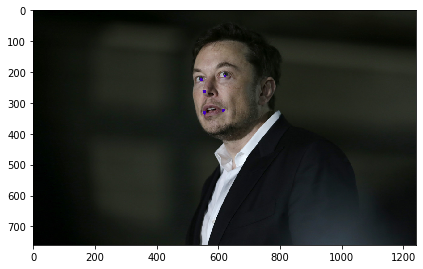

In [ ]:
LANDMARKS_SIZE = 5  # size of plotted landmarks
LANDMARKS_COLOR_RGB = (64, 0, 180)

image = io.imread(image_filename)
landmarks = fa.get_landmarks(image)

if landmarks is not None:  # could be None if no faces were found on a given image (also raises a warning in the output)
    # Draw the landmarks on the image.

    # Picture with 68 landmarks: https://ibug.doc.ic.ac.uk/media/uploads/images/annotpics/figure_68_markup.jpg
    # Ordinal numbers of the five needed landmarks (counting from 0) according 
    # to that picture:
    #   left eye's left corner: 36
    #   left eye's right corner: 39
    #   right eye's left corner: 42
    #   right eye's right corner: 45
    #   nose's tip: 30 (not 33!)
    #   mouth's left corner: 48 
    #   mouth's right corner: 54

    landmarks = landmarks[0]

    # Compute the landmarks (coords) of the left eye's center
    left_eye_left_corner_lm = landmarks[36]
    left_eye_right_corner_lm = landmarks[39]
    left_corner_x, left_corner_y = left_eye_left_corner_lm
    right_corner_x, right_corner_y = left_eye_right_corner_lm
    left_eye_center_x = (left_corner_x + (right_corner_x - left_corner_x) / 2)
    left_eye_center_y = (left_corner_y + (right_corner_y - left_corner_y) / 2)
    left_eye_center_lm = (left_eye_center_x, left_eye_center_y)
    left_eye_center_lm = np.array(left_eye_center_lm, dtype='float32')

    # Compute the landmarks (coords) of the right eye's center
    right_eye_left_corner_lm = landmarks[42]
    right_eye_right_corner_lm = landmarks[45]
    left_corner_x, left_corner_y = right_eye_left_corner_lm
    right_corner_x, right_corner_y = right_eye_right_corner_lm
    right_eye_center_x = (left_corner_x + (right_corner_x - left_corner_x) / 2)
    right_eye_center_y = (left_corner_y + (right_corner_y - left_corner_y) / 2)
    right_eye_center_lm = (right_eye_center_x, right_eye_center_y)
    right_eye_center_lm = np.array(right_eye_center_lm, dtype='float32')

    # Get the other landmarks
    nose_tip_lm = landmarks[30]
    mouth_left_corner_lm = landmarks[48]
    mouth_right_corner_lm = landmarks[54]
    
    five_landmarks = [left_eye_center_lm, right_eye_center_lm, nose_tip_lm, 
                      mouth_left_corner_lm, mouth_right_corner_lm]
                    
    for (x, y) in five_landmarks:
        print(x, y)
        cv2.circle(image, (x, y), LANDMARKS_SIZE, LANDMARKS_COLOR_RGB, -1)  

    io.imshow(image)

In [ ]:
# Write the five landmarks to a file
output_filename = image_filename.split('.')[0] + '.txt'
with open(output_filename, 'w') as f:
    for (x, y) in five_landmarks:
        f.write(f'{x} {y}\n')